Objectif de cette analyse:
    Visualiser les données de C02 dans l'atmosphère depuis l'an 0 et étude comparatoire entre taux de C02 dans l'atmosphère et anomalies de températures

In [1]:
# Importation des Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Importation du jeu de données mole_fraction_of_carbon_dioxide_in_air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-1-0_gr3-GMNHSH_0000-2014 2.csv
df_co2 = pd.read_csv('mole_fraction_of_carbon_dioxide_in_air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-1-0_gr3-GMNHSH_0000-2014 2.csv')
df_co2.head()

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454,277.454,277.454
1,1,277.137,277.137,277.137
2,2,277.160,277.160,277.160
3,3,277.158,277.158,277.158
4,4,277.157,277.157,277.157


In [3]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              2015 non-null   int64  
 1   data_mean_global  2015 non-null   float64
 2   data_mean_nh      2015 non-null   float64
 3   data_mean_sh      2015 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 63.1 KB


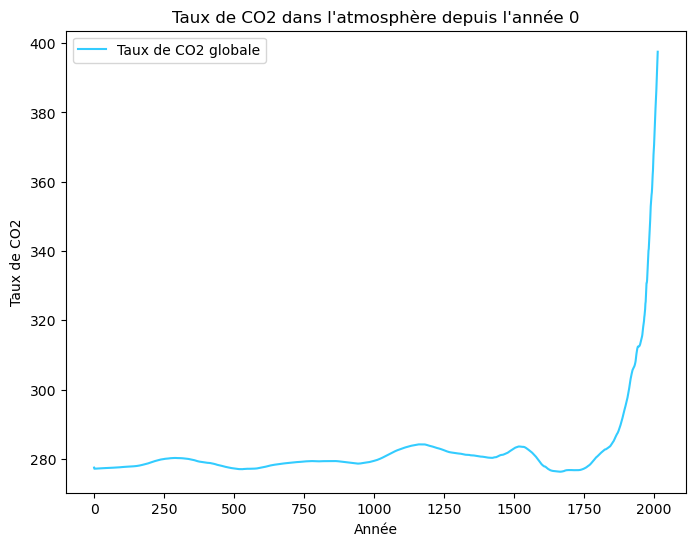

In [6]:
# Création d'une courbe du taux de CO2 dans l'atmosphère depuis l'année 0

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

x = df_co2['year']
y1 = df_co2['data_mean_global']


ax1.plot(x, y1, color='#33CCFF', label="Taux de CO2 globale")


plt.ylabel('Taux de CO2')
ax1.set_xlabel('Année')

ax1.legend(loc='best');
plt.title("Taux de CO2 dans l'atmosphère depuis l'année 0");

Le graphique montre le taux de C02 globale dans l’atmosphère depuis l’année 0. 
Ce taux était assez stationnaire mais nous constatons que depuis le début du 19ème siècle et l’avènement de la révolution industrielle le taux a très fortement augmenté.



In [8]:
# Importation du jeu de données de températures

df_temp = pd.read_csv('températures_globales_hémisphériques.csv', index_col=0)
df_temp.head()

,Year,Month,Anomaly-Gl,Uncertainty-Gl,Anomaly-NH,Uncertainty-NH,Anomaly-SH,Uncertainty-SH
0,1753,1,-1.264,3.651,NaN,NaN,NaN,NaN
1,1753,2,-1.985,4.124,NaN,NaN,NaN,NaN
2,1753,3,0.279,3.657,NaN,NaN,NaN,NaN
3,1753,4,-1.289,2.167,NaN,NaN,NaN,NaN
4,1753,5,-0.436,2.144,NaN,NaN,NaN,NaN


In [9]:
# Renommage de la colonne year de df_co2
df_co2.rename(columns={'year': 'Year'}, inplace=True)

In [10]:
# Fusion des 2 dtatframes

df_co2_temp = df_co2.merge(right = df_temp, on = 'Year', how = 'inner')
df_co2_temp

,Year,data_mean_global,data_mean_nh,data_mean_sh,Month,Anomaly-Gl,Uncertainty-Gl,Anomaly-NH,Uncertainty-NH,Anomaly-SH,Uncertainty-SH
0,1753,277.263000,277.263000,277.263000,1,-1.264,3.651,NaN,NaN,NaN,NaN
1,1753,277.263000,277.263000,277.263000,2,-1.985,4.124,NaN,NaN,NaN,NaN
2,1753,277.263000,277.263000,277.263000,3,0.279,3.657,NaN,NaN,NaN,NaN
3,1753,277.263000,277.263000,277.263000,4,-1.289,2.167,NaN,NaN,NaN,NaN
4,1753,277.263000,277.263000,277.263000,5,-0.436,2.144,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3139,2014,397.546977,399.590917,395.503037,8,1.067,0.113,0.992,0.126,1.060,0.149
3140,2014,397.546977,399.590917,395.503037,9,1.062,0.100,0.745,0.112,1.486,0.135
3141,2014,397.546977,399.590917,395.503037,10,1.157,0.071,0.927,0.163,1.437,0.102
3142,2014,397.546977,399.590917,395.503037,11,0.660,0.113,0.631,0.142,0.950,0.136


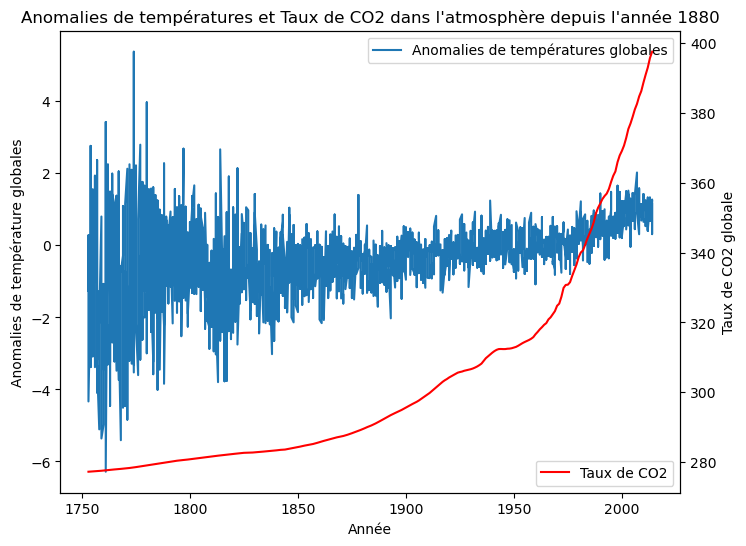

In [11]:
# Création d'un graphe de comparaison entre la couirbe du C02 et celle des anomalies de température

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

x = df_co2_temp['Year']
y1 = df_co2_temp['Anomaly-Gl']
y2 = df_co2_temp['data_mean_global']

ax1.plot(x, y1, label="Anomalies de températures globales")
ax1.set_ylabel('Anomalies de température globales')

ax2 = ax1.twinx() # Fonction importante !
ax2.plot(x, y2, 'r', label="Taux de CO2")
# ax2.set_xlim([250, 400])
ax2.set_ylabel('Taux de CO2 globale');

ax1.set_xlabel('Année')

#plt.legend(); 
ax1.legend()
ax2.legend(loc='lower right')

plt.title("Anomalies de températures et Taux de CO2 dans l'atmosphère depuis l'année 1880");

In [12]:
# Importation du module Pearson r

from scipy.stats import pearsonr


In [13]:
# création d'un tableau numpy 2D
df_co2_temp_array = df_co2_temp.values

In [14]:
#test de corrélation de pearson
co2 = df_co2_temp_array[:,1]
temp = df_co2_temp_array[:,4]
coef_cor, pvalue = pearsonr(co2, temp)
print(coef_cor, pvalue)

-4.7704895589362195e-18 1.0000000000009397


In [20]:
# il existe une forte corrélation positive et statistiquement significative  entre le taux de CO2 et les anomalies de température